# <center> Data Science and Machine Learning </center>
## <center> AML 1114 : Group - Yaar Beli </center>
## <center> Term Project - Fraud Detection System using Python and Machine Learning  </center>

<div class="alert alert-block alert-info"> <b>
    DataSet Used :
    https://www.kaggle.com/datasets/dark06thunder/credit-card-dataset</b>

<div class="alert alert-block alert-warning">
    
    
<b>Attributes </b> 

- ID: An identifier for each entry in the dataset. It's a unique numerical value assigned to each record.

- GENDER: The gender of the individual. This is a categorical variable with values like 'Male' and 'Female'.

- CAR: Indicates whether the individual owns a car or not. This is a categorical variable with values like 'Yes' and 'No'.

- REALITY: Indicates whether the individual owns a house or an apartment. This is a categorical variable with values like 'Yes' and 'No'.

- NO_OF_CHILD: The number of children the individual has. This is a numerical variable.

- INCOME: The income of the individual. This is a numerical variable represented as a floating-point value.

- INCOME_TYPE: The type of income the individual receives. This is a categorical variable indicating the source of income, like 'Salary', 'Pension', etc.

- EDUCATION_TYPE: The type of education the individual has received. This is a categorical variable representing different education levels.

- FAMILY_TYPE: The type of family the individual is a part of. This is a categorical variable indicating the family structure.

- HOUSE_TYPE: The type of housing the individual resides in. This is a categorical variable indicating different housing arrangements.

- FLAG_MOBIL: A binary flag indicating whether the individual has a mobile phone. It's a categorical variable with values like '1' (Yes) and '0' (No).

- WORK_PHONE: A binary flag indicating whether the individual has a work phone. It's a categorical variable with values like '1' (Yes) and '0' (No).

- PHONE: A binary flag indicating whether the individual has a personal phone. It's a categorical variable with values like '1' (Yes) and '0' (No).

- E_MAIL: A binary flag indicating whether the individual has an email address. It's a categorical variable with values like '1' (Yes) and '0' (No).

- FAMILY SIZE: The size of the individual's family, including themselves. This is a numerical variable represented as a floating-point value.

- BEGIN_MONTH: The month when the individual's relationship with the organization started. This is a numerical variable.

- AGE: The age of the individual. This is a numerical variable.

- YEARS_EMPLOYED: The number of years the individual has been employed. This is a numerical variable.

- TARGET: The target variable indicating whether the individual meets a certain criteria or not. This is a binary variable with values like '1' (Yes) and '0' (No).

This dataset appears to contain information about individuals, including demographic characteristics, financial attributes, employment details, and a target variable. It could be used for various analytical and modeling purposes, such as predicting the 'TARGET' variable based on the other features.
</div>

## 1. Data extraction and exploration

In [18]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [19]:
# Importing the data
train_df = pd.read_csv(r"credit_dataset.csv")
data = train_df.copy()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [21]:
print(data.shape)
print(data.columns)

(25134, 20)
Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')


In [22]:
data.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [28]:
# Checking unique values for all features
unique = data.nunique().sort_values(ascending=True).reset_index().rename(columns = {'index': 'Feature', 0: 'Unique_Count'})
unique

,Feature,Unique_Count
0,TARGET,2
1,GENDER,2
2,CAR,2
3,REALITY,2
4,E_MAIL,2
5,PHONE,2
6,WORK_PHONE,2
7,FAMILY_TYPE,5
8,INCOME_TYPE,5
9,EDUCATION_TYPE,5


In [29]:
# Lets categorize differnt features into their respective categories
categorical_features = unique[(unique['Unique_Count'] <10)]['Feature'].tolist()

numeric_features=unique[(unique['Unique_Count'] > 20)]['Feature'].tolist()

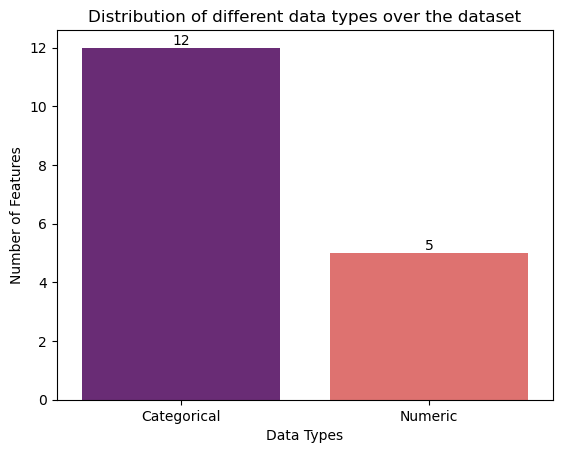

In [30]:
# Find the number of features based on their data types
data_types = ['Categorical', 'Numeric']
num_lst = [len(categorical_features), len(numeric_features)]

# Plotting the graph showing the difference between data types
plot = sns.barplot(x = data_types, y = num_lst, palette = 'magma')

# Show value for each bar in the graph
plot.bar_label(plot.containers[0])

plt.title('Distribution of different data types over the dataset')
plt.xlabel('Data Types')
plt.ylabel('Number of Features')
plt.show()

## 2. Data Validation and Cleansing

In [24]:
# 'FLAG_MOBIL' column has only 1 unique value
data['FLAG_MOBIL']

0        1
1        1
2        1
3        1
4        1
        ..
25129    1
25130    1
25131    1
25132    1
25133    1
Name: FLAG_MOBIL, Length: 25134, dtype: int64

In [25]:
#Flag_mobil columns is of no use as it has only one value
data.drop(columns=['Unnamed: 0','FLAG_MOBIL'],inplace=True)

In [11]:
# Let's check the measures of tendenceis and percentiles of our data
data.describe()

,ID,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,2.513400e+04,25134.000000,2.513400e+04,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,5.078838e+06,0.512334,1.948339e+05,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,4.194102e+04,0.787785,1.045110e+05,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,5.008806e+06,0.000000,2.700000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,5.042228e+06,0.000000,1.350000e+05,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,5.079004e+06,0.000000,1.800000e+05,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,5.115604e+06,1.000000,2.250000e+05,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


In [12]:
#Lets check for missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
ID,0,0.0
GENDER,0,0.0
YEARS_EMPLOYED,0,0.0
AGE,0,0.0
BEGIN_MONTH,0,0.0
FAMILY SIZE,0,0.0
E_MAIL,0,0.0
PHONE,0,0.0
WORK_PHONE,0,0.0
HOUSE_TYPE,0,0.0


In [13]:
# Checking for Duplicate data
data[data.duplicated()]

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET


### Outliers in continous features

In [31]:
# Function to plot continous features with target
def plot_continuous_vs_target(data, continuous_feature):
    # Create a box plot of continuous feature vs TARGET
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TARGET', y=continuous_feature, data=data, palette=['lightgreen', 'salmon'])
    plt.title(f'Box Plot of {continuous_feature} vs TARGET')
    plt.xlabel('TARGET')
    plt.ylabel(continuous_feature)
    plt.show()

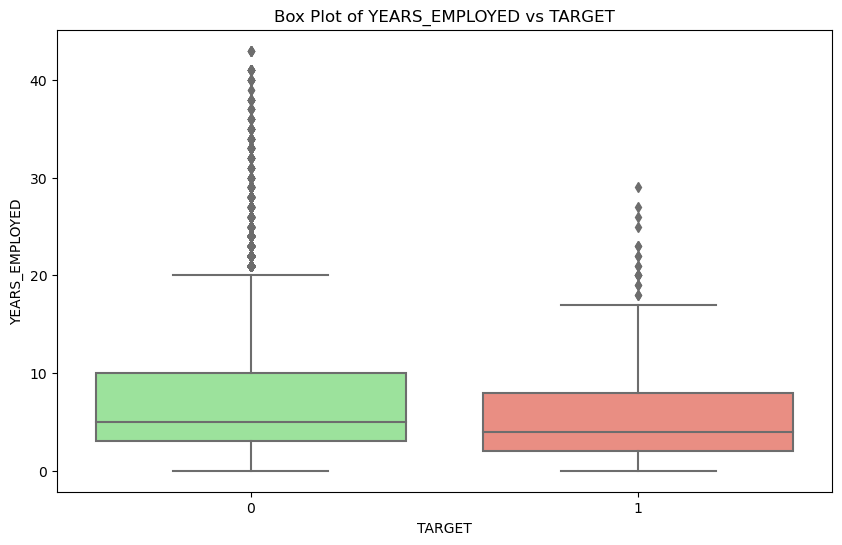

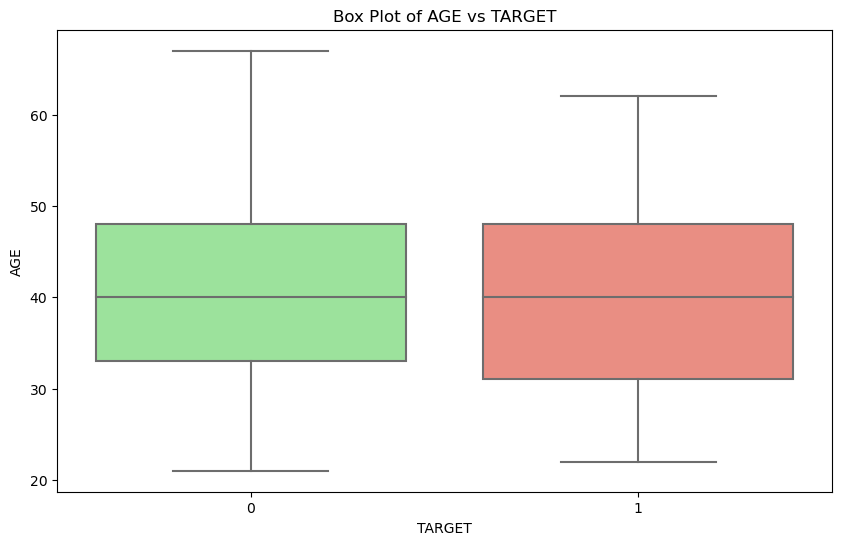

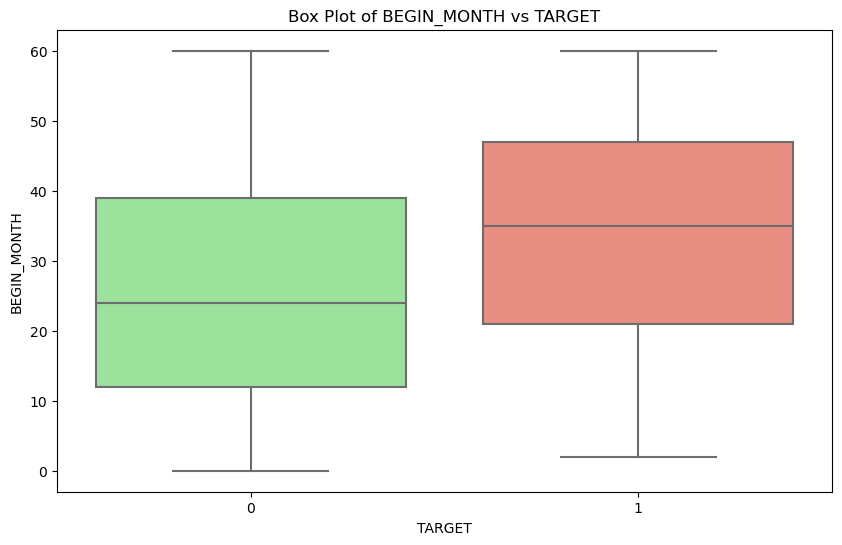

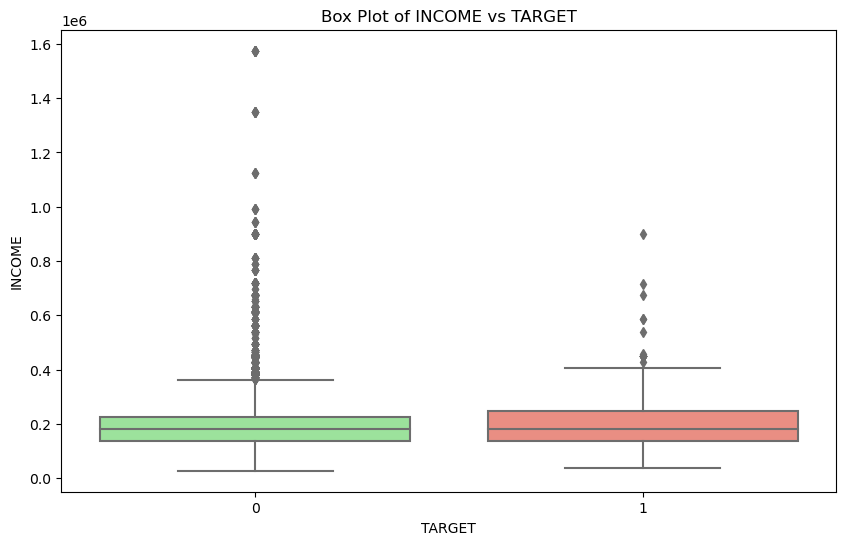

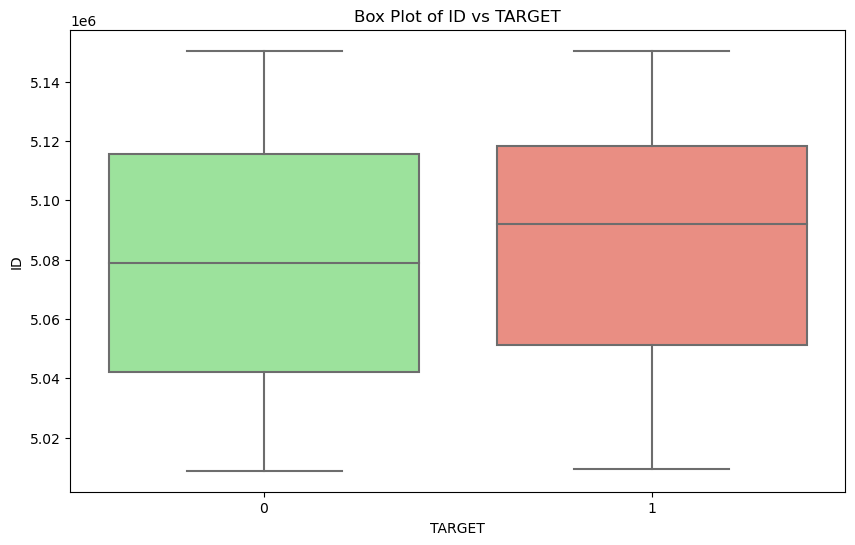

In [33]:
# Call the function for each continuous feature
for feature in numeric_features:
    plot_continuous_vs_target(data, feature)

## 3. Data Analytics and Visualisation Section

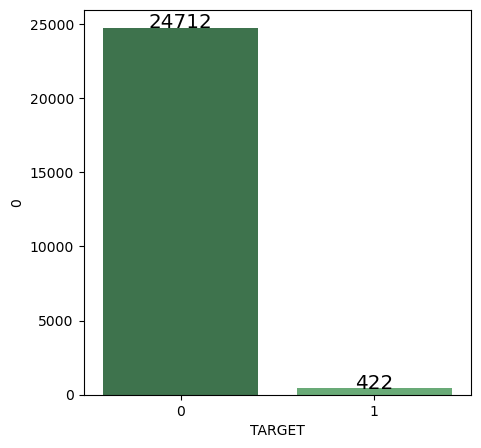

In [34]:
#Calculating count of Fraud vs No Fraud cases
plt.figure(figsize=(5,5))
target_group = data.groupby('TARGET').size().reset_index()
pal = sns.color_palette("Greens_d", len(target_group))
rank = target_group["TARGET"].argsort().argsort()
g = sns.barplot(x = target_group['TARGET'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['TARGET'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [35]:
def plot_custom_colored_bar(data, column_name):
    # Group data based on the specified column and 'TARGET' columns and calculate fraud counts
    fraud_counts = data.groupby([column_name, 'TARGET'])['ID'].count().reset_index()

    # Define custom color palettes for fraud and non-fraud
    fraud_palette = {0: 'lightblue', 1: 'salmon'}
    non_fraud_palette = {0: 'lightgreen', 1: 'grey'}

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Create a bar plot for counts of fraud with custom colors in the first subplot
    sns.barplot(x=column_name, y='ID', hue='TARGET', data=fraud_counts[fraud_counts['TARGET'] == 1], palette=fraud_palette, ax=axes[0])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].set_title(f'Counts of Fraud Based on {column_name}')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Fraud Count')

    # Create a bar plot for counts of non-fraud with custom colors in the second subplot
    sns.barplot(x=column_name, y='ID', hue='TARGET', data=fraud_counts[fraud_counts['TARGET'] == 0], palette=non_fraud_palette, ax=axes[1])
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1].set_title(f'Counts of Non-Fraud Based on {column_name}')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Not Fraud Count')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()



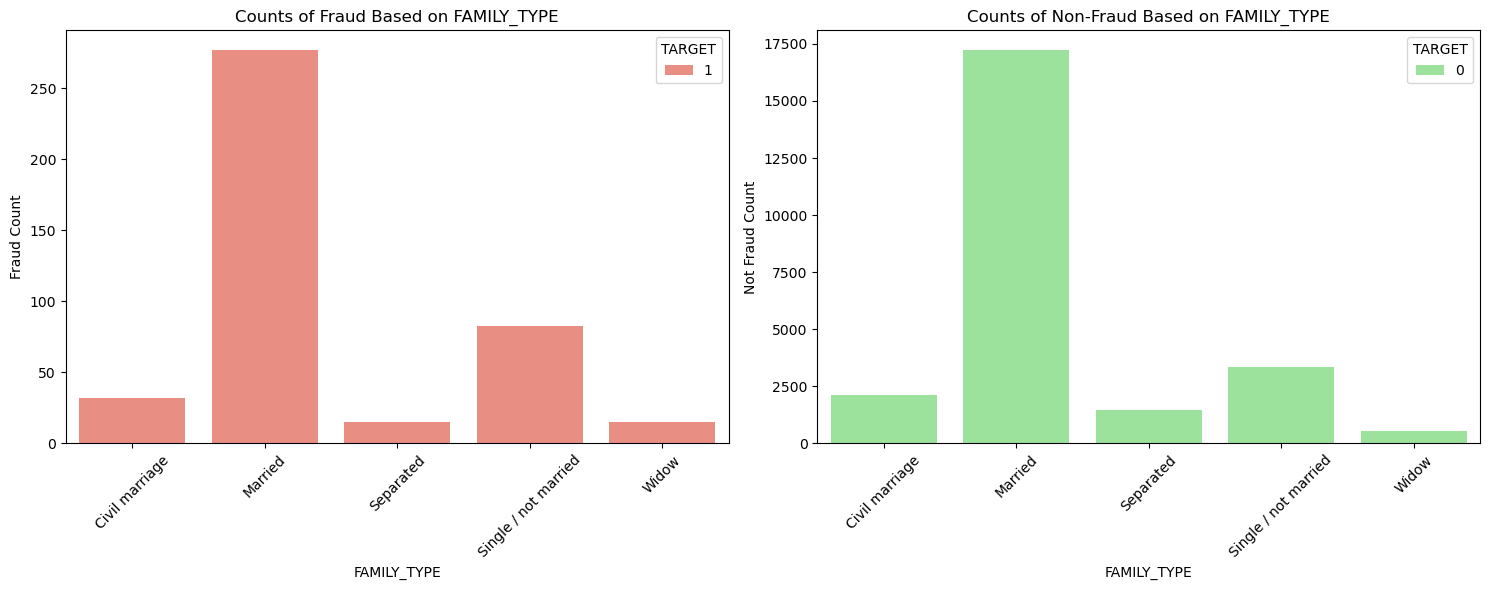

In [36]:
# Call the function to create bar plots with custom colors for FAMILY_TYPE
plot_custom_colored_bar(data, 'FAMILY_TYPE')

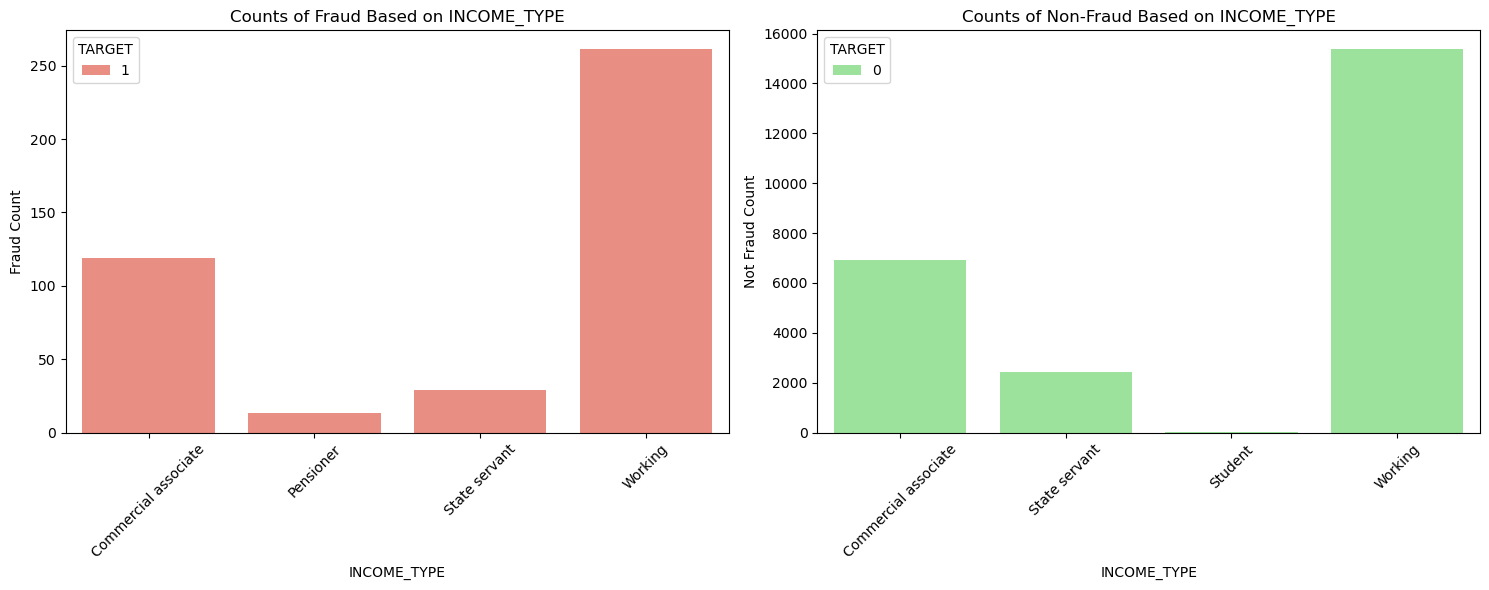

In [37]:
# Call the function to create bar plots with custom colors for INCOME TYPE
plot_custom_colored_bar(data, 'INCOME_TYPE')

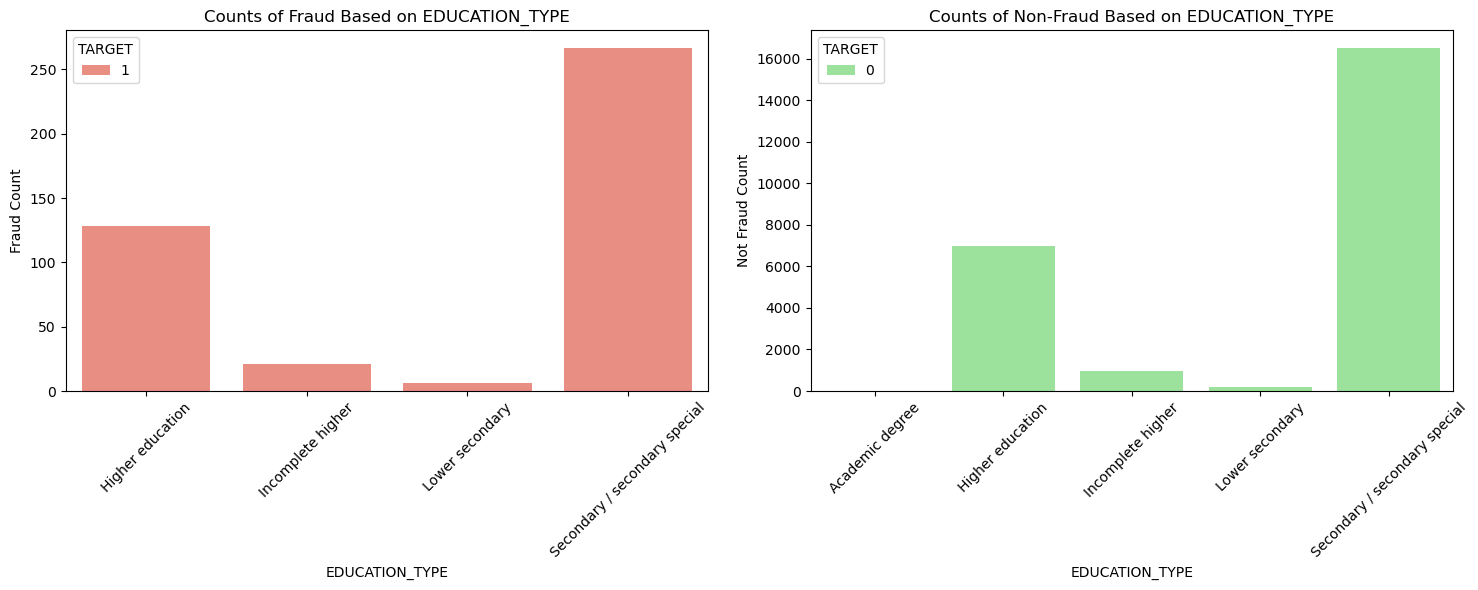

In [38]:
# Call the function to create bar plots with custom colors for EDUCATION_TYPE
plot_custom_colored_bar(data, 'EDUCATION_TYPE')

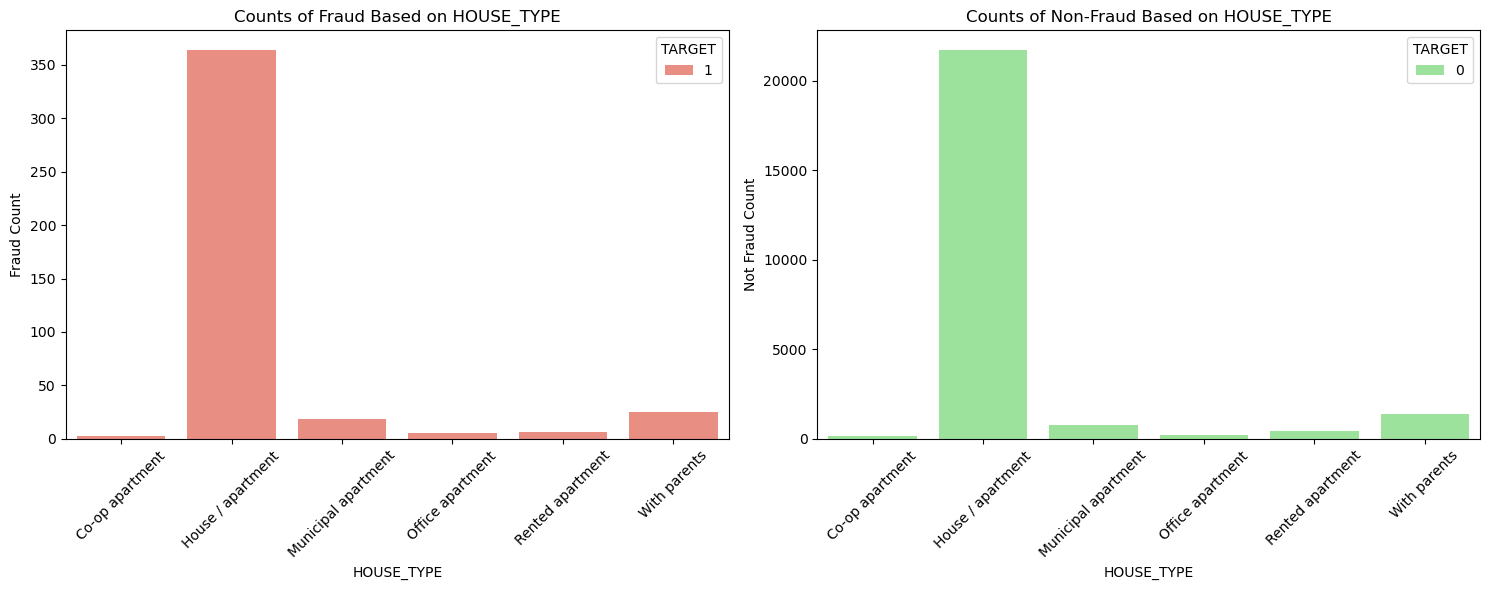

In [39]:
# Call the function to create bar plots with custom colors for HOUSE_TYPE
plot_custom_colored_bar(data, 'HOUSE_TYPE')

In [40]:
data_fraud = data[data['TARGET'] == 1]
data_no_fraud = data[data['TARGET'] == 0]

Text(0.5, 1.0, 'NO FRAUD')

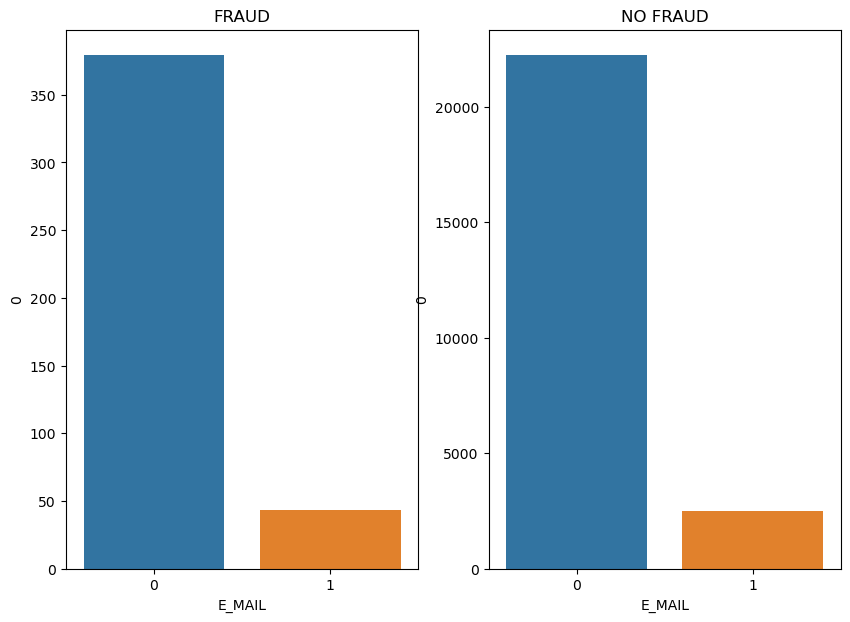

In [41]:
#Plotting data to the relation between fraudster and Email
fraud_email = data_fraud.groupby('E_MAIL').size().reset_index()
no_fraud_email = data_no_fraud.groupby('E_MAIL').size().reset_index()
# fraud_email
# data_no_fraud.groupby('E_MAIL').size()
fig,axes = plt.subplots(1,2,figsize=(10,7))
sns.barplot(ax = axes[0],x ='E_MAIL',y=0,data=fraud_email)
axes[0].set_title("FRAUD")
sns.barplot(ax = axes[1],x ='E_MAIL',y=0,data=no_fraud_email)
axes[1].set_title("NO FRAUD")

Text(0.5, 1.0, 'NO FRAUD')

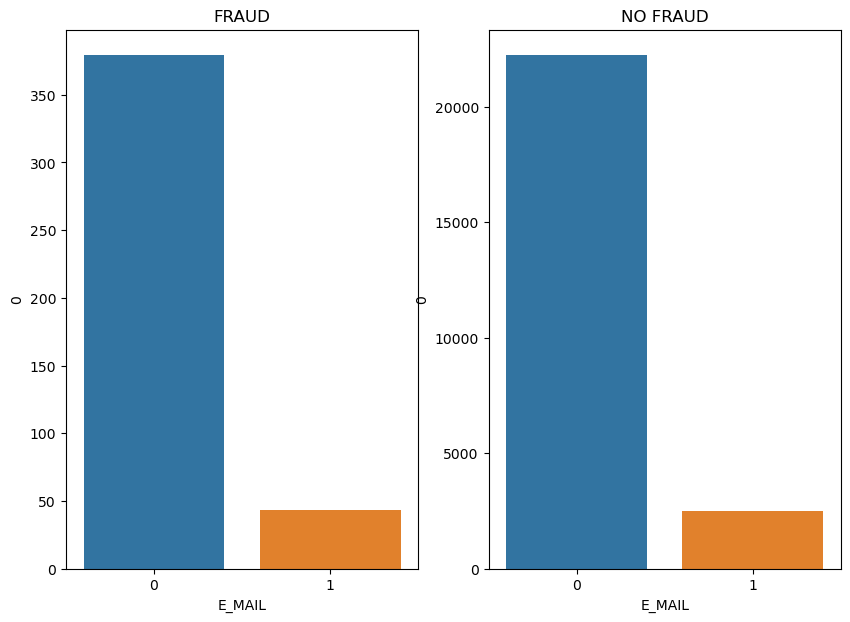

In [42]:
#Plotting data to the relation between fraudster and Email
fraud_email = data_fraud.groupby('E_MAIL').size().reset_index()
no_fraud_email = data_no_fraud.groupby('E_MAIL').size().reset_index()
# fraud_email
# data_no_fraud.groupby('E_MAIL').size()
fig,axes = plt.subplots(1,2,figsize=(10,7))
sns.barplot(ax = axes[0],x ='E_MAIL',y=0,data=fraud_email)
axes[0].set_title("FRAUD")
sns.barplot(ax = axes[1],x ='E_MAIL',y=0,data=no_fraud_email)
axes[1].set_title("NO FRAUD")

<AxesSubplot:xlabel='YEARS_EMPLOYED', ylabel='0'>

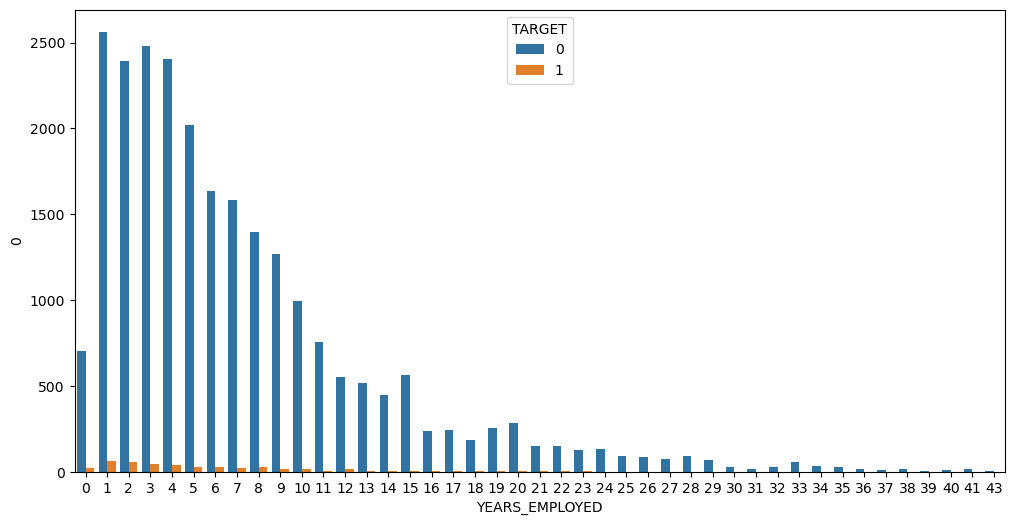

In [43]:
#Lets see if years employed has any effect on target
employ_data = data.groupby(['YEARS_EMPLOYED','TARGET']).size().reset_index()
# employ_data[(employ_data['YEARS_EMPLOYED'] > 20) & (employ_data['TARGET'] == 1)]
plt.figure(figsize=(12,6))
sns.barplot(x='YEARS_EMPLOYED',y=0,hue='TARGET',data=employ_data)

<AxesSubplot:xlabel='AGE', ylabel='0'>

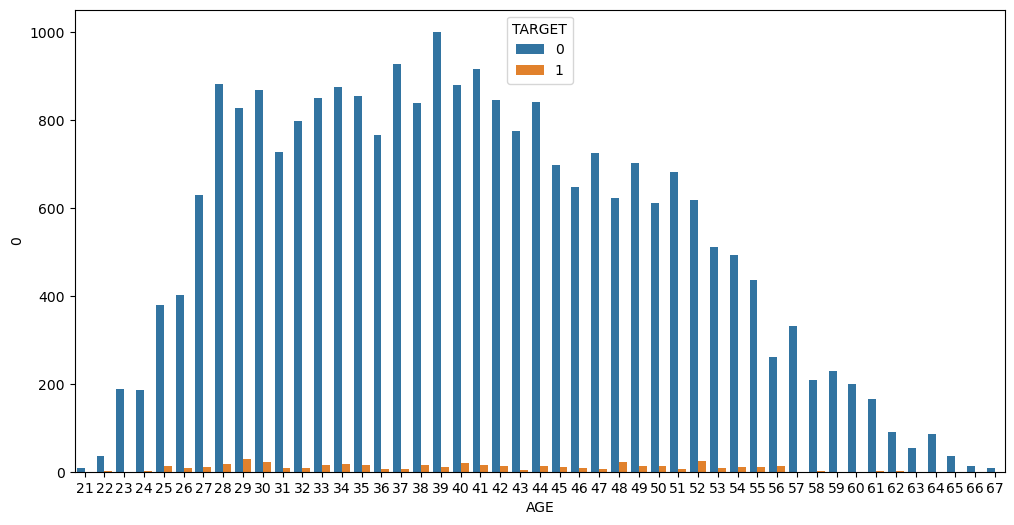

In [44]:
#Lets check the relation between age and Fraud
age_data = data.groupby(['AGE','TARGET']).size().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='AGE',y=0,hue='TARGET',data=age_data)

In [45]:
def encode_categorical_columns(data, columns_to_encode):
    encoded_data = data.copy()
    for column in columns_to_encode:
        encoded_data[column] = pd.factorize(encoded_data[column])[0]
    return encoded_data

In [46]:
# List of column names to encode
columns_to_encode = ['GENDER', 'CAR', 'REALITY',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE', 'FAMILY SIZE']  # Add more columns as needed

# Encode the categorical columns
encoded_data = encode_categorical_columns(data, columns_to_encode)

In [47]:
encoded_data.head()

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,5008806,0,0,0,0,112500.0,0,0,0,0,0,0,0,0,29,59,3,0
1,5008808,1,1,0,0,270000.0,1,0,1,0,0,1,1,1,4,52,8,0
2,5008809,1,1,0,0,270000.0,1,0,1,0,0,1,1,1,26,52,8,0
3,5008810,1,1,0,0,270000.0,1,0,1,0,0,1,1,1,26,52,8,0
4,5008811,1,1,0,0,270000.0,1,0,1,0,0,1,1,1,38,52,8,0


In [48]:
data['INCOME'] = data['INCOME'].astype(int)

Text(0.5, 1.0, 'Distribution')

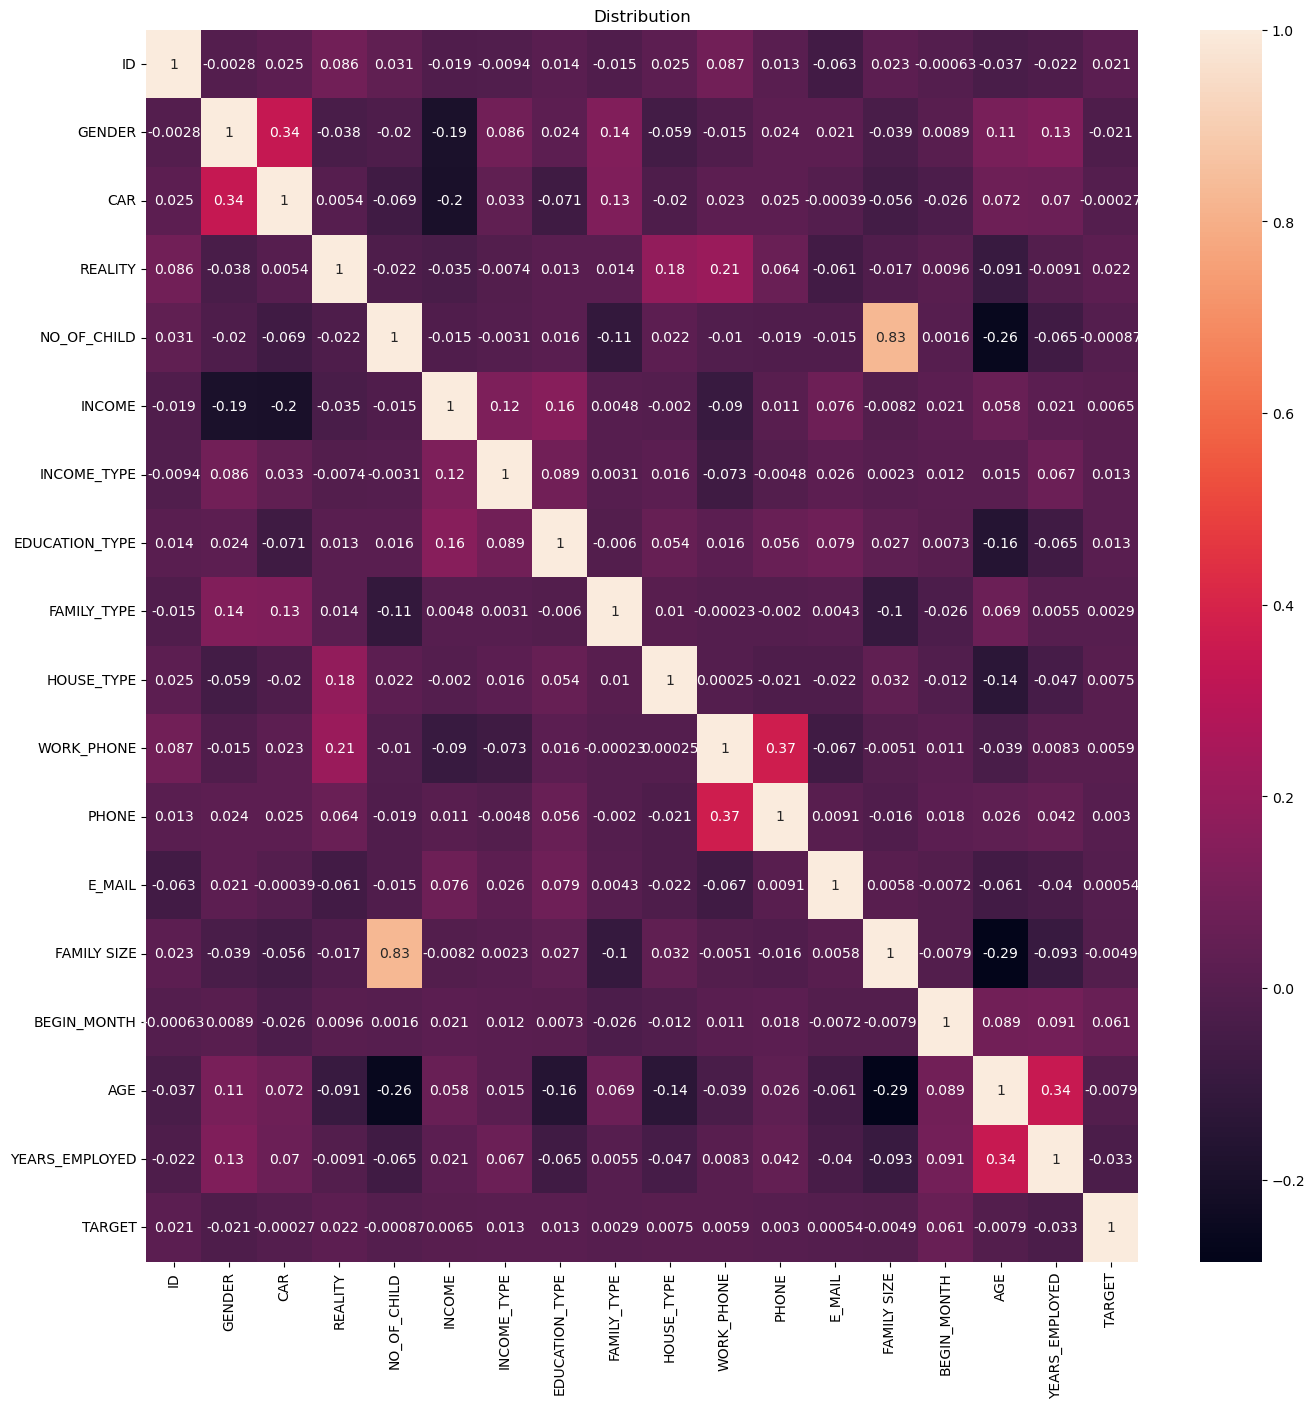

In [49]:
plt.figure(figsize=(16,16))
# data.hist(figsize=(20,12))
sns.heatmap(encoded_data.corr(),annot=True)
plt.title("Distribution")

## 4. Feature Selection and Building Prediction Model(Utilization of Analysis Results)

In [50]:
encoded_data['TARGET'].value_counts()

TARGET
0    24712
1      422
Name: count, dtype: int64

In [51]:
# Separate the dataset into target classes
fraud_data = encoded_data[encoded_data['TARGET'] == 1]
non_fraud_data = encoded_data[encoded_data['TARGET'] == 0]

# Calculate the desired number of samples from each class
num_samples = min(len(fraud_data), len(non_fraud_data))
fraction = 0.0 #Change this to your desired fraction
fraction2 = 0.2

# Calculate the number of samples to select from the larger class
num_samples_from_larger_class = int(num_samples * fraction)
num_samples = int(num_samples * fraction2)

# Randomly select samples from both classes
selected_fraud_data = fraud_data.sample(n=num_samples, random_state=42)
selected_non_fraud_data = non_fraud_data.sample(n=num_samples_from_larger_class, random_state=42)

# Combine the selected samples from both classes
balanced_subset = pd.concat([selected_fraud_data, selected_non_fraud_data], ignore_index=True)

In [52]:
balanced_subset['TARGET'].value_counts()

TARGET
1    84
Name: count, dtype: int64

In [53]:
balanced_subset.index

RangeIndex(start=0, stop=84, step=1)

In [54]:
# Exclude the rows in the balanced subset from the original dataset
training_data = encoded_data[~encoded_data['ID'].isin(balanced_subset['ID'])]
test_data = balanced_subset

In [55]:
training_data['TARGET'].value_counts()

TARGET
0    24712
1      338
Name: count, dtype: int64

In [56]:
# Defining a class for different predictive models to avoid code repetition.
class predictive_models:
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
    
    # Let's define a function for plotting feature importances for each differnt model.
    def feat_importance(self, model, title):
        def plot_importance(model, features, num=len(X)):
                plt.figure(figsize=(7, 7))
                sns.set(font_scale=1)
                sns.barplot(x="Value", y="Feature", data=features.sort_values(by="Value", ascending=False)[0:num])
                plt.title(title)
                plt.tight_layout()
                plt.show()

        features = X.columns
        importances = model.feature_importances_

        feat_importances = pd.DataFrame()
        feat_importances['Feature'] = features
        feat_importances['Value'] = importances

        # Call the plot_importance function
        plot_importance(model, feat_importances)

        # Print fancy table
        sorted_feat_importances = feat_importances.sort_values('Value', ascending=False)
        # print(tabulate(sorted_feat_importances, headers='keys', tablefmt='pretty', showindex=False))
    
    # Let's define a function to visualise, learning curves for each model
    def learning_curve(self, model):
      
        from sklearn.model_selection import learning_curve, validation_curve

        # Learning curve
        train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5)

        # Calculate mean and standard deviation for training and test scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot learning curve
        plt.figure()
        plt.title("Learning Curve")
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()
    
    # Let's define a function to plot ROC curve for each model
    def ROC_curve(self, model, y_pred_curve, title):
        
        from sklearn.metrics import roc_curve


        fpr, tpr, _ = roc_curve(y_test, y_pred_curve)
        f1 = f1_score(y_test, y_pred_curve)

        plt.figure(figsize=(9, 5))
        plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_pred_curve):.2f}')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="lower right")
          
    # The parameters mentioned inside the function name are parameters that will be used for hyperparameter tuning, initially they are set to their default values.
    def RandomforestClassifier(self, feat_imp = 'yes', bootstrap=True, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100, want_model = 'No'):
        from sklearn.ensemble import RandomForestClassifier 

        rfr_model = RandomForestClassifier(bootstrap = bootstrap,
                             max_depth=max_depth,
                             max_features=max_features,
                             min_samples_leaf= min_samples_leaf,
                             min_samples_split= min_samples_split,
                             n_estimators= n_estimators)
        rfr_model.fit(self.x_train,self.y_train)

        y_prob_rfr = rfr_model.predict(self.x_test)

        print("Precision Score with RandomForest: ", precision_score(self.y_test, y_prob_rfr))
        print("Recall Score with RandomForest: ", recall_score(self.y_test, y_prob_rfr))
        print("F1 Score Score with RandomForest: ", f1_score(self.y_test, y_prob_rfr))
        print("Accuracy Score with RandomForest: ", accuracy_score(self.y_test, y_prob_rfr))
        print("ROC by RandomForest:",roc_auc_score(self.y_test,y_prob_rfr))
        
        # Setting up an if loop to decide if we want to visualise feture importance or not.
        if feat_imp == 'yes':
            title = 'Feature Importance for Random Forest Classifier'
            self.feat_importance(rfr_model,title)
        # Calling ROC_curve function to visulaise ROC curve    
        self.ROC_curve(rfr_model, y_prob_rfr, title = 'ROC curve for Random Forest')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(rfr_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return rfr_model
    
    # The parameters mentioned inside the function name are parameters that will be used for hyperparameter tuning, initially they are set to their default values.   
    def AdaBoostClassifier(self, feat_imp = 'yes', learning_rate=1, n_estimators= 50, want_model = 'No'):
        from sklearn.ensemble import AdaBoostClassifier

        AB_model = AdaBoostClassifier(learning_rate=learning_rate, n_estimators= n_estimators, random_state=2022)
        AB_model.fit(self.x_train,self.y_train)

        y_prob_AB = AB_model.predict(self.x_test)

        print("Precision Score with AdaBoost: ", precision_score(self.y_test, y_prob_AB))
        print("Recall Score with AdaBoost: ", recall_score(self.y_test, y_prob_AB))
        print("F1 Score Score with AdaBoost: ", f1_score(self.y_test, y_prob_AB))
        print("Accuracy Score with AdaBoost: ", accuracy_score(self.y_test, y_prob_AB))
        print("ROC by AdaBoost:",roc_auc_score(self.y_test,y_prob_AB))
        
        # Setting up an if loop to decide if we want to visualise feture importance or not.
        if feat_imp == 'yes':
            title = 'Feature Importance for AdaBoost Classifier'
            self.feat_importance(AB_model,title)
        # Calling ROC_curve function to visulaise ROC curve
        self.ROC_curve(AB_model, y_prob_AB, title = 'ROC curve for AdaBoost')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(AB_model)
        
        # Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return AB_model
    
        
    def XGB(self, feat_imp = 'yes', base_score=0.5,booster = 'gbtree',gamma= 0,learning_rate= 0.1,n_estimators= 100,reg_alpha= 0,reg_lambda= 1, want_model = 'No'):
        import xgboost as xgb
        from sklearn.metrics import roc_auc_score

        XGB_model = xgb.XGBClassifier(base_score=base_score,
                                         booster = booster,
                                         gamma= gamma,
                                         learning_rate= learning_rate,
                                         n_estimators= n_estimators,
                                         reg_alpha= reg_alpha,
                                         reg_lambda= reg_lambda)
        XGB_model.fit(self.x_train, self.y_train)
        y_prob_xgb = XGB_model.predict(self.x_test)

        print("Precision Score with XGB: ", precision_score(self.y_test, y_prob_xgb))
        print("Recall Score with XGB: ", recall_score(self.y_test, y_prob_xgb))
        print("F1 Score Score with XGB: ", f1_score(self.y_test, y_prob_xgb))
        print("Accuracy Score with XGB: ", accuracy_score(self.y_test, y_prob_xgb))
        print("ROC by XGB:", roc_auc_score(self.y_test, y_prob_xgb))
        
        # Setting up an if loop to decide if we want to visualise feture importance or not.
        if feat_imp == 'yes':
            
            title = 'Feature Importance for GB Classifier.'
            self.feat_importance(XGB_model,title)
            
        # Calling ROC_curve function to visulaise ROC curve
        self.ROC_curve(XGB_model, y_prob_xgb, title = 'ROC curve for XGB')
        
        # Calling learning_curve() function to visualise it.
        self.learning_curve(XGB_model)
        
        #Setting up an if loop to decide if we want to retrieve the trained model or not.
        if want_model == 'yes':
            return XGB_model

In [57]:
# Importing libraries for different metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [58]:
# Train test Split
from sklearn.model_selection import train_test_split
X = training_data.drop(['TARGET','ID'], axis = 1)
y = training_data['TARGET']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Defining instance of our class
obj1 = predictive_models(x_train,x_test,y_train,y_test)

#### RandomForest Classifier

Precision Score with RandomForest:  0.42105263157894735
Recall Score with RandomForest:  0.11428571428571428
F1 Score Score with RandomForest:  0.17977528089887637
Accuracy Score with RandomForest:  0.9854291417165668
ROC by RandomForest: 0.5560294968189705


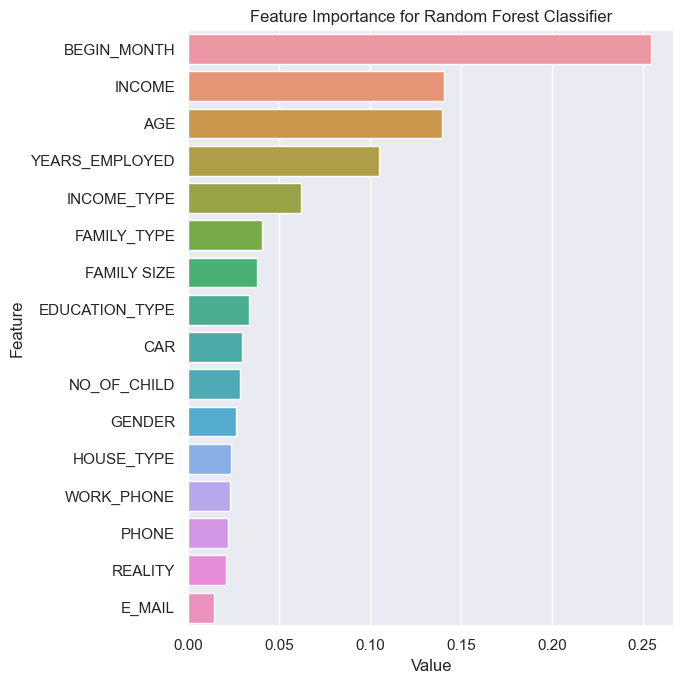

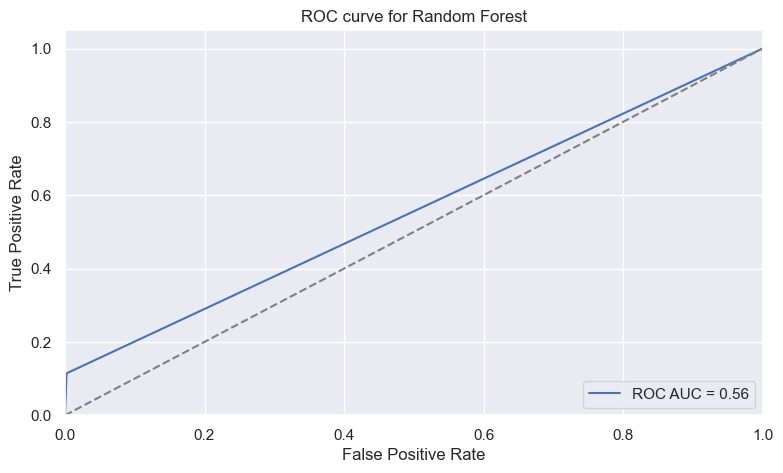

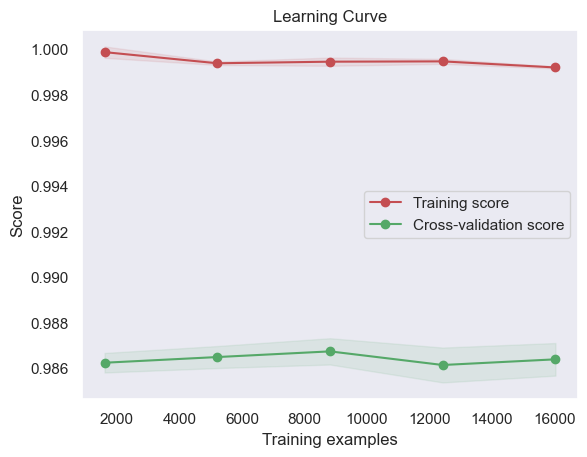

Accuracy Score with RFC:  0.10714285714285714


In [60]:
RFR_model = obj1.RandomforestClassifier(want_model = 'yes')
y_pred = RFR_model.predict(test_data.drop(['TARGET', 'ID'], axis = 1))
print("Accuracy Score with RFC: ", accuracy_score(y_pred, test_data['TARGET']))

#### ADA Boost Classifier

Precision Score with AdaBoost:  0.75
Recall Score with AdaBoost:  0.04285714285714286
F1 Score Score with AdaBoost:  0.08108108108108107
Accuracy Score with AdaBoost:  0.9864271457085828
ROC by AdaBoost: 0.5213273568536726


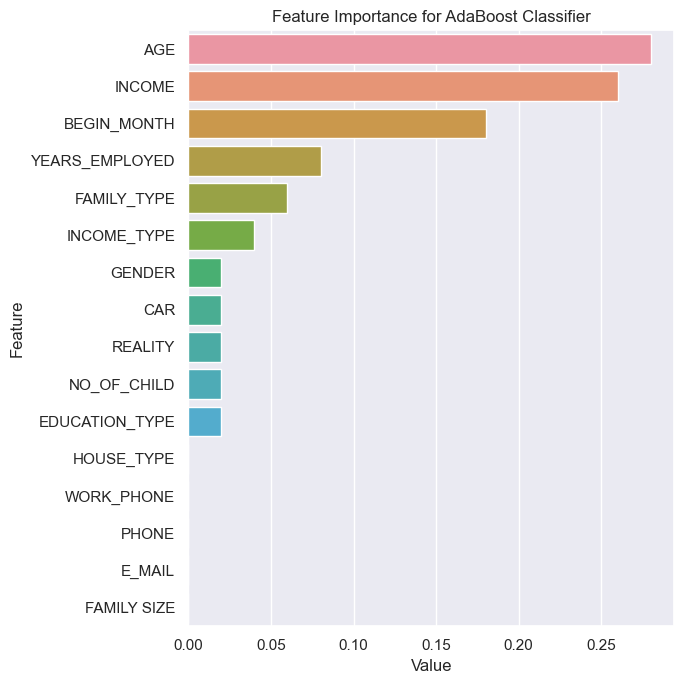

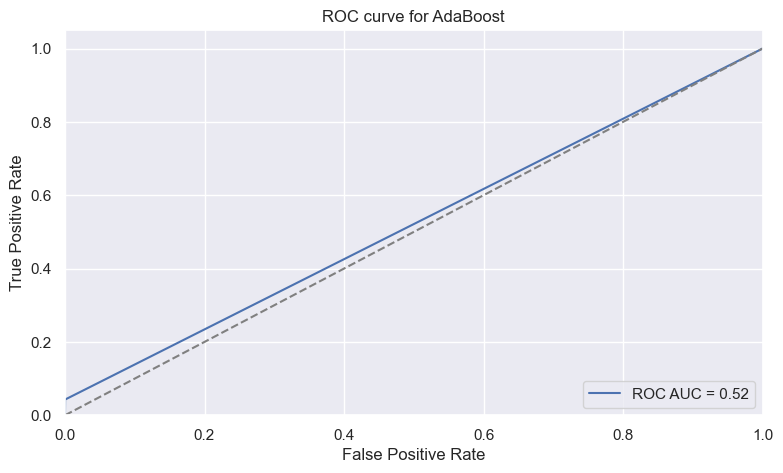

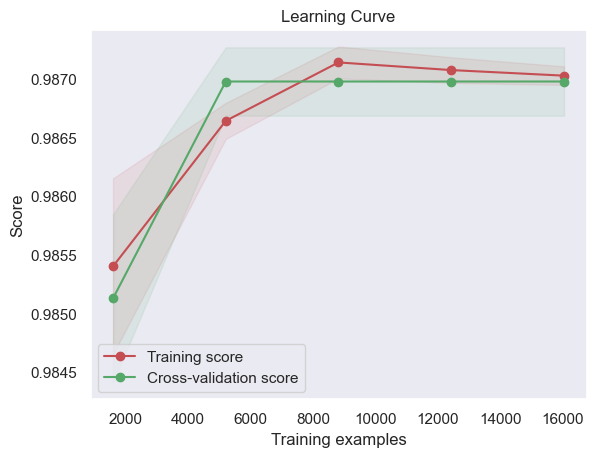

Accuracy Score with ADA:  0.03571428571428571


In [61]:
AB_model = obj1.AdaBoostClassifier(feat_imp = 'yes', want_model = 'yes')
y_pred = AB_model.predict(test_data.drop(['TARGET', 'ID'], axis = 1))
print("Accuracy Score with ADA: ", accuracy_score(y_pred, test_data['TARGET']))

Precision Score with XGB:  0.8
Recall Score with XGB:  0.05714285714285714
F1 Score Score with XGB:  0.10666666666666666
Accuracy Score with XGB:  0.986626746506986
ROC by XGB: 0.5284702139965298


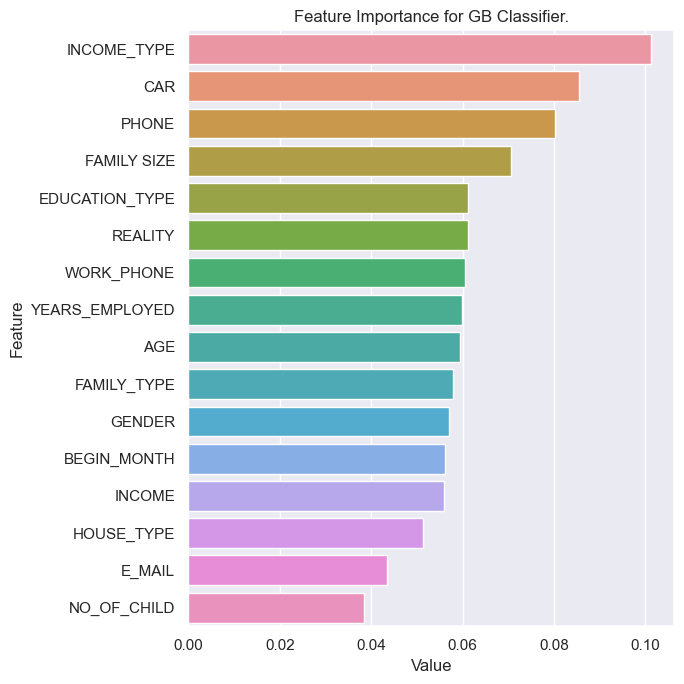

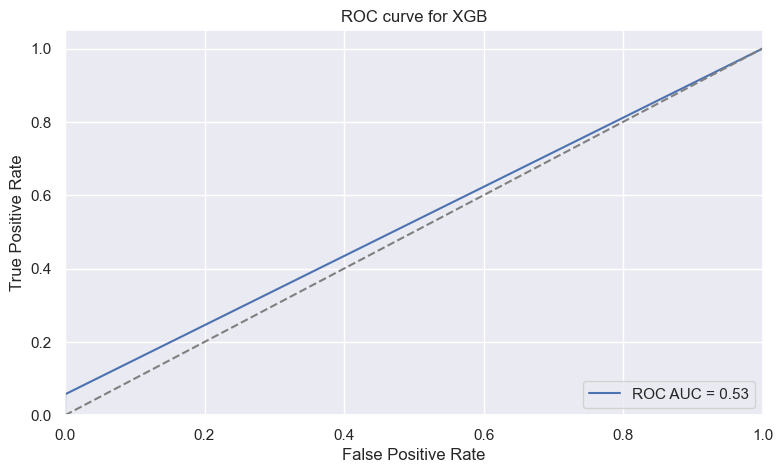

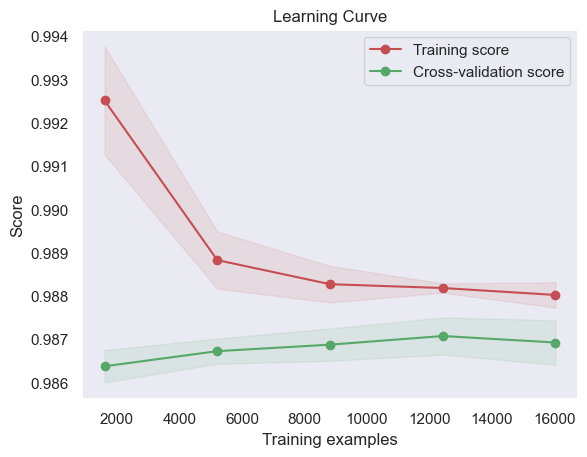

Accuracy Score with GBC:  0.047619047619047616


In [62]:
XGB_model = obj1.XGB(feat_imp = 'yes', want_model = 'yes')
y_pred = XGB_model.predict(test_data.drop(['TARGET', 'ID'], axis = 1))
print("Accuracy Score with GBC: ", accuracy_score(y_pred, test_data['TARGET']))

#### Applying SMOTE

In [67]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [68]:
from sklearn.model_selection import train_test_split
X = training_data.drop(['TARGET','ID'], axis = 1)
y = training_data['TARGET']
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [69]:
obj2 = predictive_models(x_train,x_test,y_train,y_test)

#### RandomForest Classifier post SMOTE 

Precision Score with RandomForest:  0.9871951219512195
Recall Score with RandomForest:  0.9899718723248135
F1 Score Score with RandomForest:  0.9885815472919338
Accuracy Score with RandomForest:  0.9885346413243409
ROC by RandomForest: 0.9885307535729564


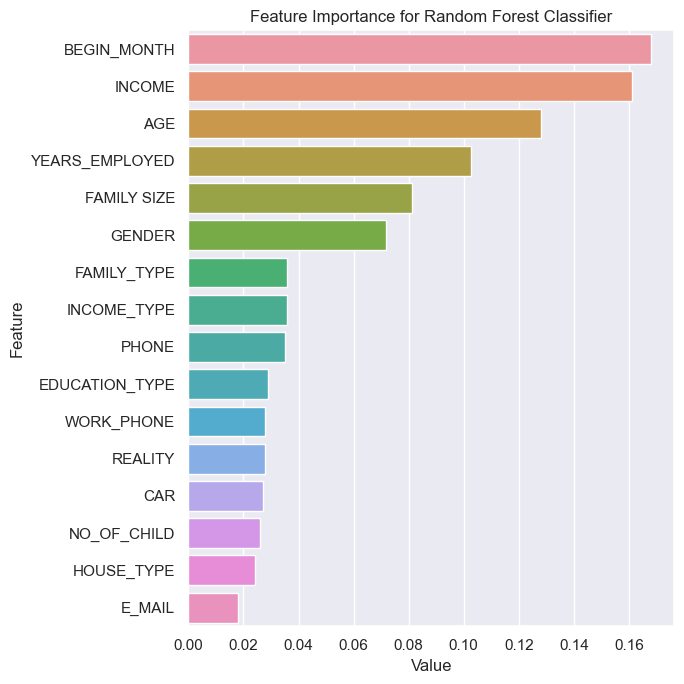

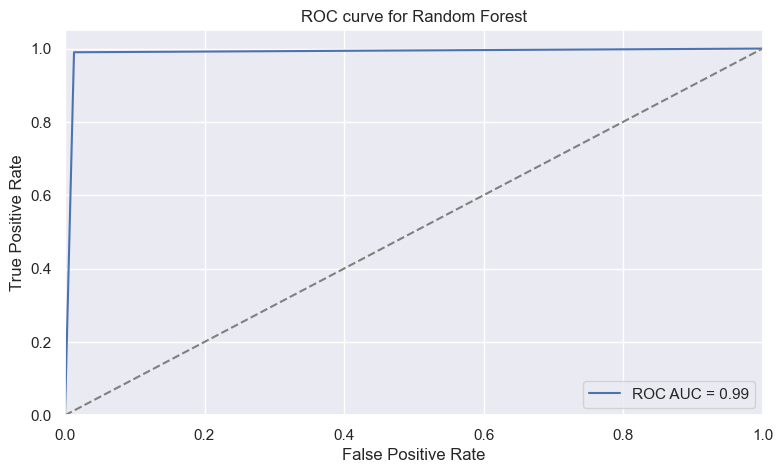

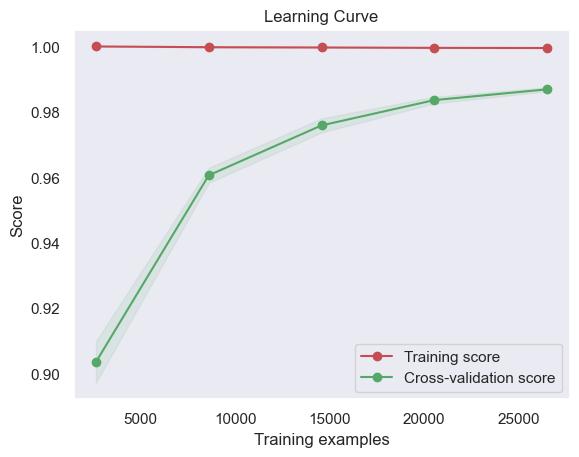

Accuracy Score with RFR_post SMOTE:  0.2976190476190476


In [74]:
RFR_model = obj2.RandomforestClassifier(want_model = 'yes')
y_pred = RFR_model.predict(test_data.drop(['TARGET', 'ID'], axis = 1))
print("Accuracy Score with RFR_post SMOTE: ", accuracy_score(y_pred, test_data['TARGET']))

In [ ]:
# Hyperparameter tuning for Randomforest classifier
parameters = {'bootstrap': [True, False],
 'max_depth': [5,10,20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split': [50,70,100,150],
 'n_estimators': [100, 150,200]}

rfc = RandomForestClassifier()
rf_random = GridSearchCV(estimator = rfc, param_grid = parameters, cv = 3, verbose=3, scoring = 'roc_auc')
# Fit the random search model
rf_random.fit(x_train,y_train)
rf_random.best_params_

Precision Score with RandomForest:  0.9082513063555717
Recall Score with RandomForest:  0.9140271493212669
F1 Score Score with RandomForest:  0.9111300743630378
Accuracy Score with RandomForest:  0.9106069895769466
ROC by RandomForest: 0.910597737946014


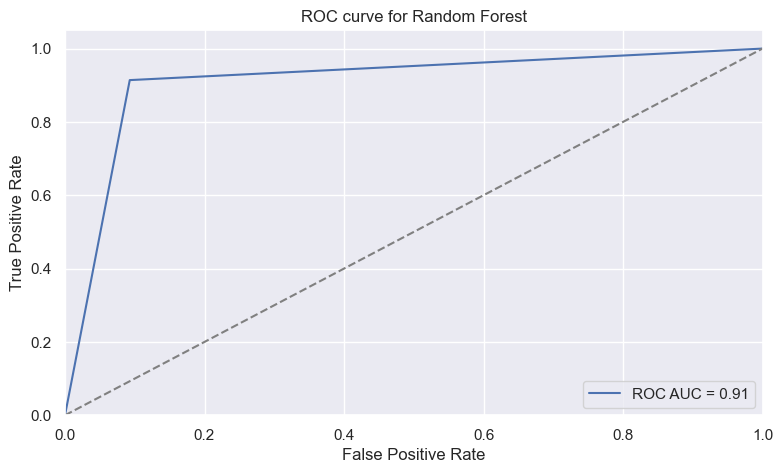

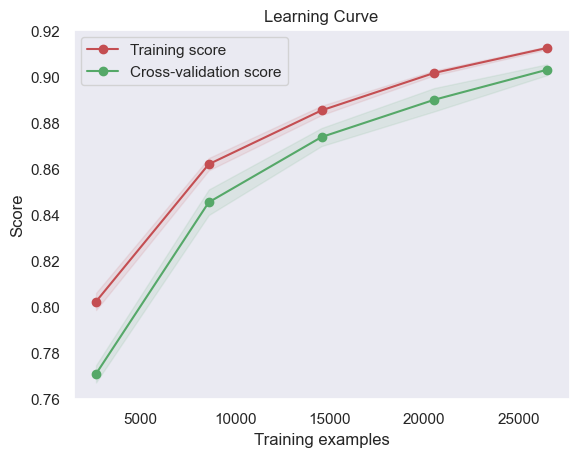

In [77]:
rfr_model = obj2.RandomforestClassifier('no',bootstrap= True,
                             max_depth=20,
                             max_features='auto',
                             min_samples_leaf= 1,
                             min_samples_split= 150,
                             n_estimators= 200,want_model = 'yes')

In [78]:
print("Accuracy Score with RFR_post SMOTE and tuning: ", accuracy_score(y_pred, test_data['TARGET']))

Accuracy Score with RFR_post SMOTE and tuning:  0.38095238095238093


#### ADA Boost Classifier post SMOTE

Precision Score with AdaBoost:  0.7589792060491494
Recall Score with AdaBoost:  0.7856181973829033
F1 Score Score with AdaBoost:  0.7720689862388078
Accuracy Score with AdaBoost:  0.7674432863274065
ROC by AdaBoost: 0.767394122667844


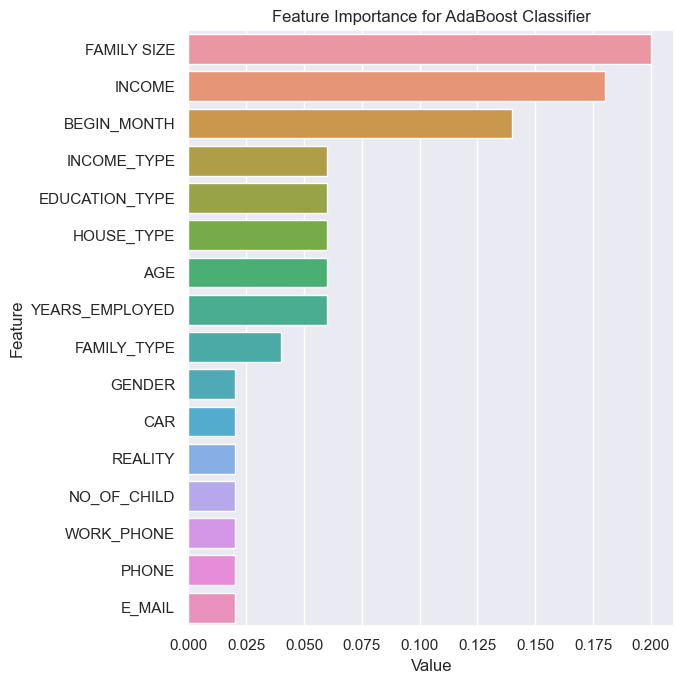

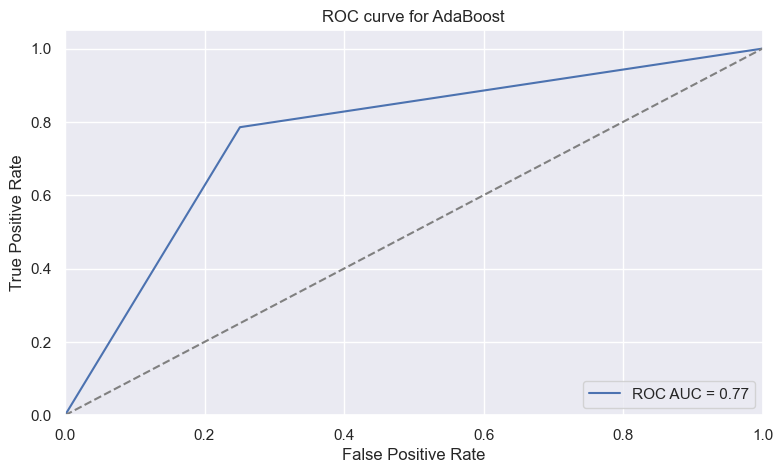

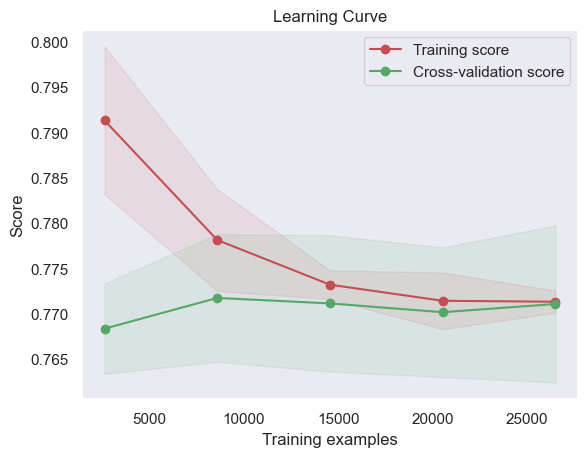

Accuracy Score with ADA post SMOTE:  0.5


In [75]:
AB_model = obj2.AdaBoostClassifier(want_model = 'yes')
y_pred = AB_model.predict(test_data.drop(['TARGET', 'ID'], axis = 1))
print("Accuracy Score with ADA post SMOTE: ", accuracy_score(y_pred, test_data['TARGET']))

In [65]:
# Hyperparameter tuning for ADAboost Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators': range(10, 150, 10),
    'learning_rate': [0.075, 0.1, 0.15,0.25],
}

AB_model = AdaBoostClassifier()
grid_search = GridSearchCV(AB_model, parameters, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'learning_rate': 0.075, 'n_estimators': 10}

Precision Score with AdaBoost:  0.7358490566037735
Recall Score with AdaBoost:  0.7821939586645469
F1 Score Score with AdaBoost:  0.7583140672239017
Accuracy Score with AdaBoost:  0.7500306560392397
ROC by AdaBoost: 0.7499436533762917


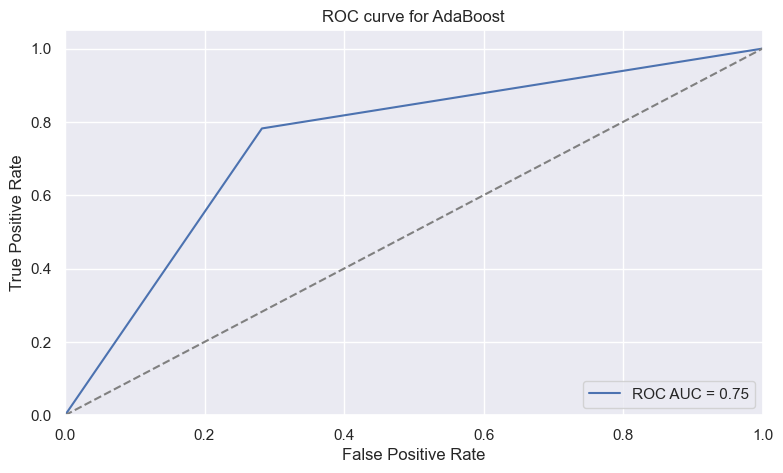

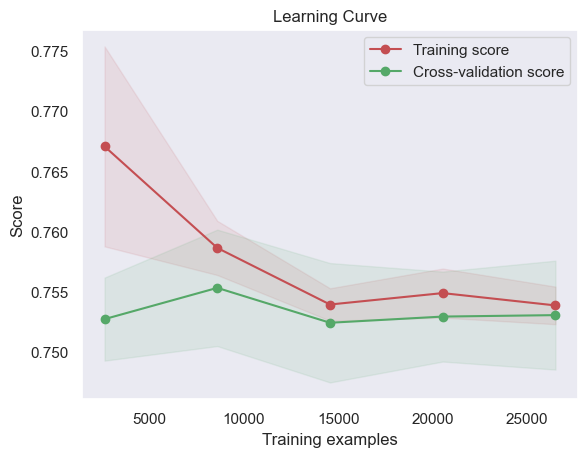

Accuracy Score with ADA:  0.5238095238095238


In [71]:
AB_model = obj2.AdaBoostClassifier('no',learning_rate=0.075, n_estimators= 10,want_model = 'yes')
y_pred_AB = AB_model.predict(test_data.drop(['TARGET', 'ID'], axis = 1))
print("Accuracy Score with ADA: ", accuracy_score(y_pred_AB, test_data['TARGET']))

#### XGB Model post SMOTE

Precision Score with XGB:  0.9128258845437617
Recall Score with XGB:  0.9591537238596062
F1 Score Score with XGB:  0.935416542429483
Accuracy Score with XGB:  0.9335990190067444
ROC by XGB: 0.9335298927917237


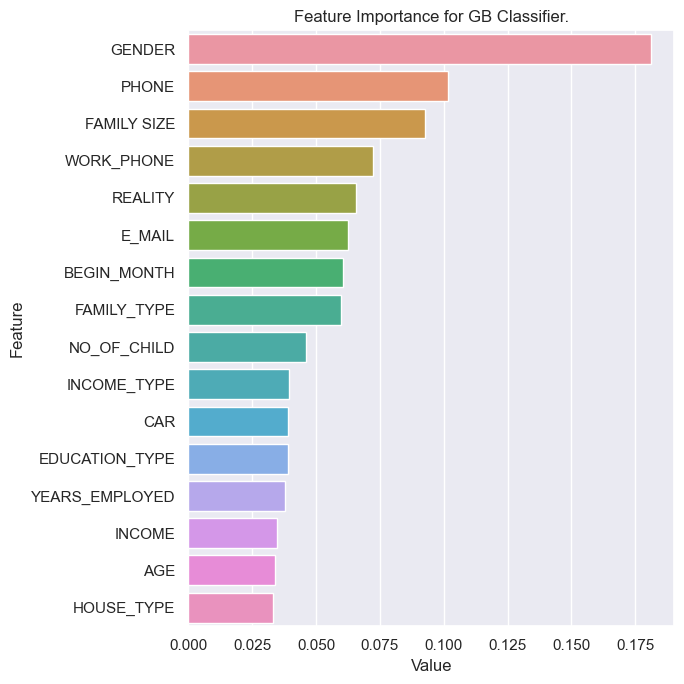

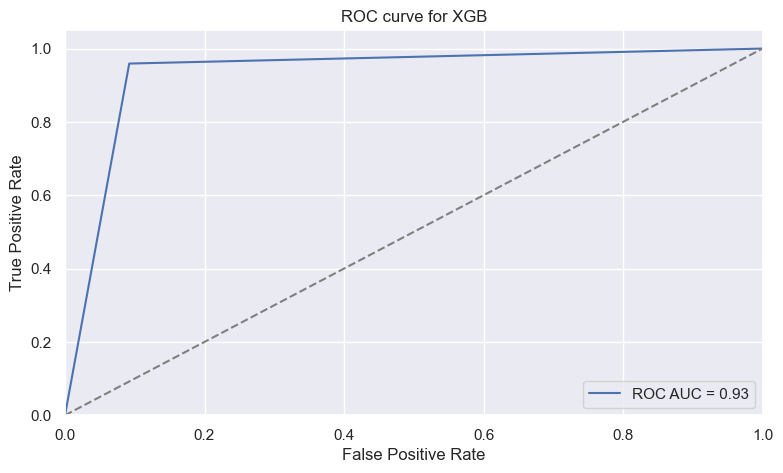

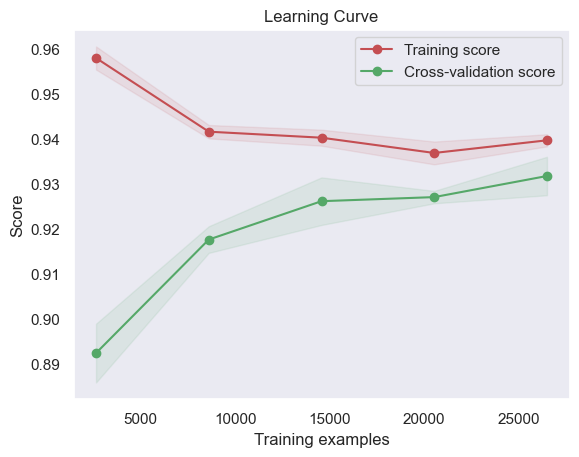

Accuracy Score with XGB post SMOTE:  0.38095238095238093


In [76]:
XGB_model = obj2.XGB(want_model = 'yes')
y_pred = XGB_model.predict(test_data.drop(['TARGET', 'ID'], axis = 1))
print("Accuracy Score with XGB post SMOTE: ", accuracy_score(y_pred, test_data['TARGET']))

In [ ]:
#Hyperparameter tuning for XGB
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}
XGB_model = XGBClassifier()
gs2 = GridSearchCV(XGB_model, params, cv=KFold(n_splits=2), scoring='roc_auc', verbose = 3)
gs2.fit(x_train, y_train)
gs2.best_params_

Precision Score with XGB:  0.8837020169160703
Recall Score with XGB:  0.6644246056010762
F1 Score Score with XGB:  0.7585340314136126
Accuracy Score with XGB:  0.7879215205395463
ROC by XGB: 0.7882555832628522


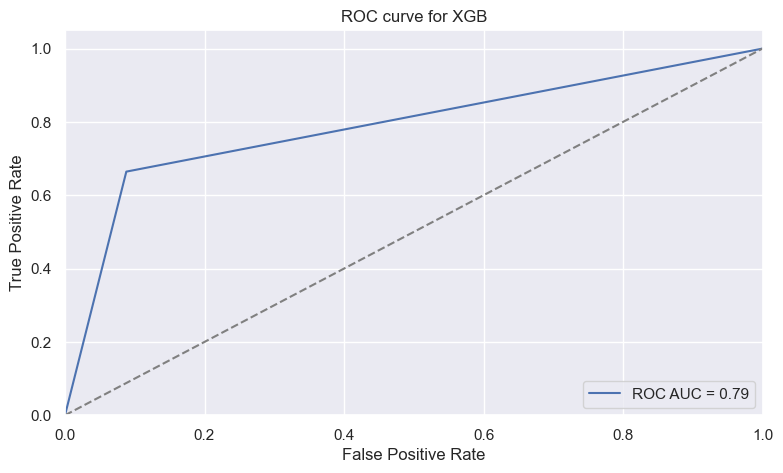

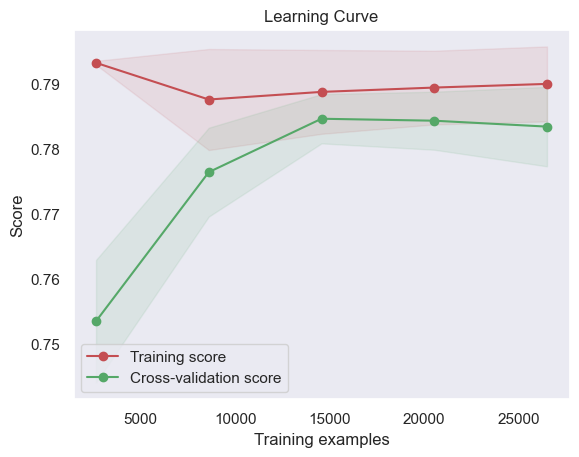

Accuracy Score post tuning:  0.34523809523809523


In [72]:
XGB_model = obj2.XGB('no',base_score=0.2,
 booster = 'gbtree',
 gamma= 0,
 learning_rate= 0.01,
 n_estimators= 100,
 reg_alpha= 0,
 reg_lambda= 0.5, want_model = 'yes')
y_pred = XGB_model.predict(test_data.drop(['TARGET', 'ID'], axis = 1))
print("Accuracy Score post tuning: ", accuracy_score(y_pred, test_data['TARGET']))

### Result on test set

In [85]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_pred_AB, test_data['TARGET'])

<AxesSubplot:>

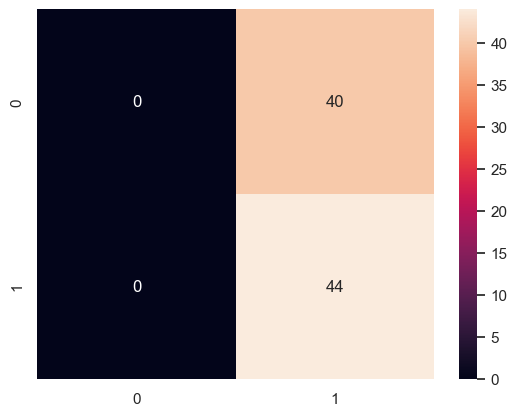

In [86]:
sns.heatmap(cf_matrix, annot=True)

### Fraud Detection final logic

In [85]:
def predict_fraud_single_row(data_row, columns_to_encode, trained_model):

    # Encode categorical columns
    encoded_data1 = encode_categorical_columns(data_row, columns_to_encode)
    
    # Make a prediction using the trained model
    prediction = AB_model.predict(encoded_data1)
    
    if prediction[0] == 1:
        return True, prediction[0]
    else:
        return False, prediction[0]
    
data_row = pd.read_csv(r'test.csv')
data_row.drop(['ID','FLAG_MOBIL'], axis=1, inplace=True)

is_fraud, predicted_label = predict_fraud_single_row(data_row, columns_to_encode, AB_model)
print("Is Fraud:", is_fraud)
print("Predicted Label:", predicted_label)


Is Fraud: True
Predicted Label: 1


### Telegram Chatbot code

In [ ]:
from telegram import Update
from telegram.ext import Updater, CommandHandler, MessageHandler, Filters, CallbackContext

# Replace 'YOUR_BOT_TOKEN' with your actual bot token
BOT_TOKEN = '6158149760:AAHe-3JEWODiIO00BhDxV5K41kL1D7fkVkI'

# Define the function to handle the /start command
def start(update: Update, context: CallbackContext) -> None:
    update.message.reply_text('Hello! Send me a CSV file.')

# Define the function to handle incoming messages with CSV files
def handle_csv(update: Update, context: CallbackContext) -> None:
    # Get the user's ID
    user_id = update.message.from_user.id

    # Check if the message has a document
    if update.message.document:
        # Get the file ID
        file_id = update.message.document.file_id

        # Download the file
        new_file = context.bot.get_file(file_id)
        new_file.download(f'{user_id}.csv')

        update.message.reply_text('CSV file received and saved.')

        # Now, you can call your fraud detection function here
        is_fraud = perform_fraud_detection(f'{user_id}.csv')

        # Send a reply based on the result
        if is_fraud:
            update.message.reply_text('The provided data appears to be fraudulent.')
        else:
            update.message.reply_text('The provided data seems to be okay.')

# Your actual fraud detection function
def perform_fraud_detection(file_path: str) -> bool:
    # Read the CSV data
    data1 = pd.read_csv(file_path)
    
    import random
    return random.choice([True, False])

# Create an Updater object with your bot token
updater = Updater(token=BOT_TOKEN, use_context=True)

# Get the dispatcher to register handlers
dispatcher = updater.dispatcher

# Register the /start command handler
dispatcher.add_handler(CommandHandler("start", start))

# Register the handler for messages with documents (CSV files)
dispatcher.add_handler(MessageHandler(Filters.document.mime_type("text/csv"), handle_csv))

# Start the bot
updater.start_polling()
updater.idle()


In [ ]:
from telegram import Update
from telegram.ext import Updater, CommandHandler, MessageHandler, Filters, CallbackContext

# Replace 'YOUR_BOT_TOKEN' with your actual bot token
BOT_TOKEN = '6158149760:AAHe-3JEWODiIO00BhDxV5K41kL1D7fkVkI'

# Define the function to handle the /start command
def start(update: Update, context: CallbackContext) -> None:
    update.message.reply_text('Hello! Send me a CSV file.')

# Define the function to handle incoming messages with CSV files
def handle_csv(update: Update, context: CallbackContext) -> None:
    # Get the user's ID
    user_id = update.message.from_user.id

    # Check if the message has a document
    if update.message.document:
        # Get the file ID
        file_id = update.message.document.file_id

        # Download the file
        new_file = context.bot.get_file(file_id)
        new_file.download(f'{user_id}.csv')

        update.message.reply_text('CSV file received and saved.')

        # Now, you can call your fraud detection function here
        # For example:
        is_fraud = perform_fraud_detection(f'{user_id}.csv')

        # Send a reply based on the result
        if is_fraud:
            update.message.reply_text('The provided data appears to be fraudulent.')
        else:
            update.message.reply_text('The provided data seems to be okay.')

# Simulate a fraud detection function
def perform_fraud_detection(file_path: str) -> bool:
    data_row = pd.read_csv(file_path)
    columns_to_encode = ['GENDER', 'CAR', 'REALITY',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE', 'FAMILY SIZE']  # Add more columns as needed
    # Encode categorical columns
    encoded_data1 = encode_categorical_columns(data_row, columns_to_encode)
    
    # Make a prediction using the trained model
    prediction = AB_model.predict(encoded_data1)
    
    if prediction[0] == 1:
        return True
    else:
        return False
    
data_row = pd.read_csv(r'test.csv')
data_row.drop(['ID','FLAG_MOBIL'], axis=1, inplace=True)

is_fraud, predicted_label = predict_fraud_single_row(data_row, columns_to_encode, AB_model)
print("Is Fraud:", is_fraud)
print("Predicted Label:", predicted_label)




# Create an Updater object with your bot token
updater = Updater(token=BOT_TOKEN, use_context=True)

# Get the dispatcher to register handlers
dispatcher = updater.dispatcher

# Register the /start command handler
dispatcher.add_handler(CommandHandler("start", start))

# Register the handler for messages with documents (CSV files)
dispatcher.add_handler(MessageHandler(Filters.document.mime_type("text/csv"), handle_csv))

# Start the bot
updater.start_polling()
updater.idle()

## 5. Conclusion

<div class="alert alert-block alert-warning">
  
- Addressing Imbalance for Effective Fraud Detection: 
    The journey to enhance fraud detection in imbalanced datasets has been both challenging and enlightening.
- Leveraging SMOTE for Balance: 
The significant class imbalance in our "Fraud Detection using Imbalanced Data" dataset prompted us to leverage Synthetic Minority Over-sampling Technique (SMOTE).
SMOTE's role in generating synthetic samples for the minority class has been instrumental in rebalancing our dataset.
- Model Exploration and Refinement: 
We embarked on a rigorous exploration of machine learning models, including Random Forest Classifier (RFC), AdaBoost Classifier (ADA), and XGBoost Classifier (XGB).
Fine-tuning the models further refined their performance, ensuring our fraud detection system delivers accurate results.


</div>